#Prediksi Penerimaan Mahasiswa ke Program Pascasarjana

##Penjelasan Dataset

**Sumber Data**: [KAGGLE] https://www.kaggle.com/datasets/mohansacharya/graduate-admissions

**Tujuan Dataset**: Untuk memprediksi peluang diterima pada program pascasarjana berdasarkan parameter akademik dan pengalaman pelamar.

**Atribut dalam Dataset**:
- GRE Scores: Skor GRE pelamar (range: 0–340).
- TOEFL Scores: Skor TOEFL pelamar (range: 0–120).
- University Rating: Peringkat universitas tujuan (range: 1–5).
- SOP Strength: Kekuatan Statement of Purpose (range: 1–5).
- LOR Strength: Kekuatan Surat Rekomendasi (range: 1–5).
- CGPA: IPK saat sarjana (range: 0–10).
- Research Experience: Pengalaman riset pelamar (binary: 0 = Tidak, 1 = Ya).

**Target**:
- Chance of Admit: Probabilitas diterima (range: 0–1).

**Tipe Data**:
- Semua atribut (kecuali Research Experience dan Chance of Admit) berupa numerik kontinu.
- Research Experience berupa biner (0 atau 1).
- Chance of Admit berupa numerik kontinu (0 hingga 1).

##Data Understanding

**Jumlah Data**: (Akan dihitung saat eksplorasi dataset).

**Distribusi Data**:

- Rata-rata nilai untuk setiap fitur (1 = 56.0, 0 = 44.0)
- Distribusi untuk variabel biner .

**Range Nilai**:

- Serial No.: 1 hingga 500
- GRE Score: 290 hingga 340
- TOEFL Score: 92 hingga 120
- University Rating: 1 hingga 5
- SOP: 1.0 hingga 5.0
- LOR : 1.0 hingga 5.0
- CGPA: 6.8 hingga 9.92
- Research: 0 hingga 1
- Chance of Admit : 0.34 hingga 0.97

##Business Understanding

**Tujuan Bisnis**:

- Membantu pelamar memahami peluang mereka diterima di universitas tujuan dengan menggunakan prediksi berbasis data.
- Memberikan wawasan tentang faktor penting yang memengaruhi penerimaan, seperti skor GRE, TOEFL, atau pengalaman riset.

**Manfaat Bisnis**:

- Membantu calon mahasiswa dalam pengambilan keputusan untuk meningkatkan peluang diterima.
- Membantu universitas untuk membuat proses penerimaan lebih transparan dan berbasis data.

##Exploratory Data Analysis

###Import Libraries

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Load Dataset

In [2]:
# Load Dataset
df = pd.read_csv('/content/Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


###Data Preperation

In [5]:
# Data preparation and Exploration
print('Number of Rows: ', df.shape[0])
print('Number of Columns: ', df.shape[1], '\n')
print('SubSet of Data:\n ', df.head(), '\n')

Number of Rows:  500
Number of Columns:  9 

SubSet of Data:
     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65   



###Labeling

In [13]:
# labeling data
labels = ['Serial No.', 'GRE Score',	'TOEFL Score',	'University Rating',	'SOP',	'LOR',	'CGPA',	'Research', 'Target']
df.columns = labels
print('Columns Names:', df.columns, '\n')
print('Data Describe:\n ', df.describe(), '\n')
print('Data Information:'); print(df.info())

Columns Names: Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Target'],
      dtype='object') 

Data Describe:
         Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

             LOR        CGPA    Research     Target  
count  500.00000  500.000000  500.000000  500.00000  
mean     3.48400    

###Cek Data yang Duplikat

In [14]:
# Check For duplicated
print(df.duplicated().any())
duplicated = df.duplicated()
print('Number of duplicated data: ', duplicated[duplicated == True].size)

False
Number of duplicated data:  0


###EDA

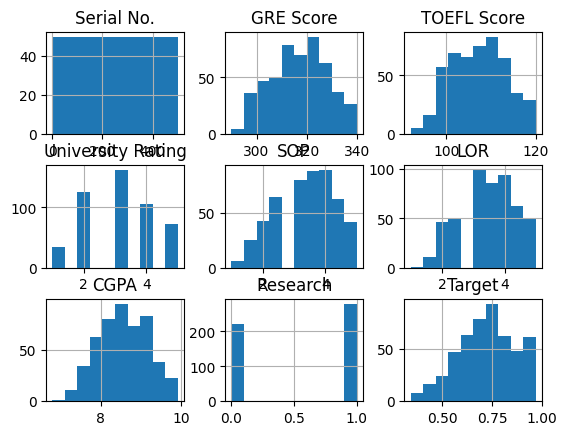

In [15]:
# Data histogram
df.hist()
plt.show()

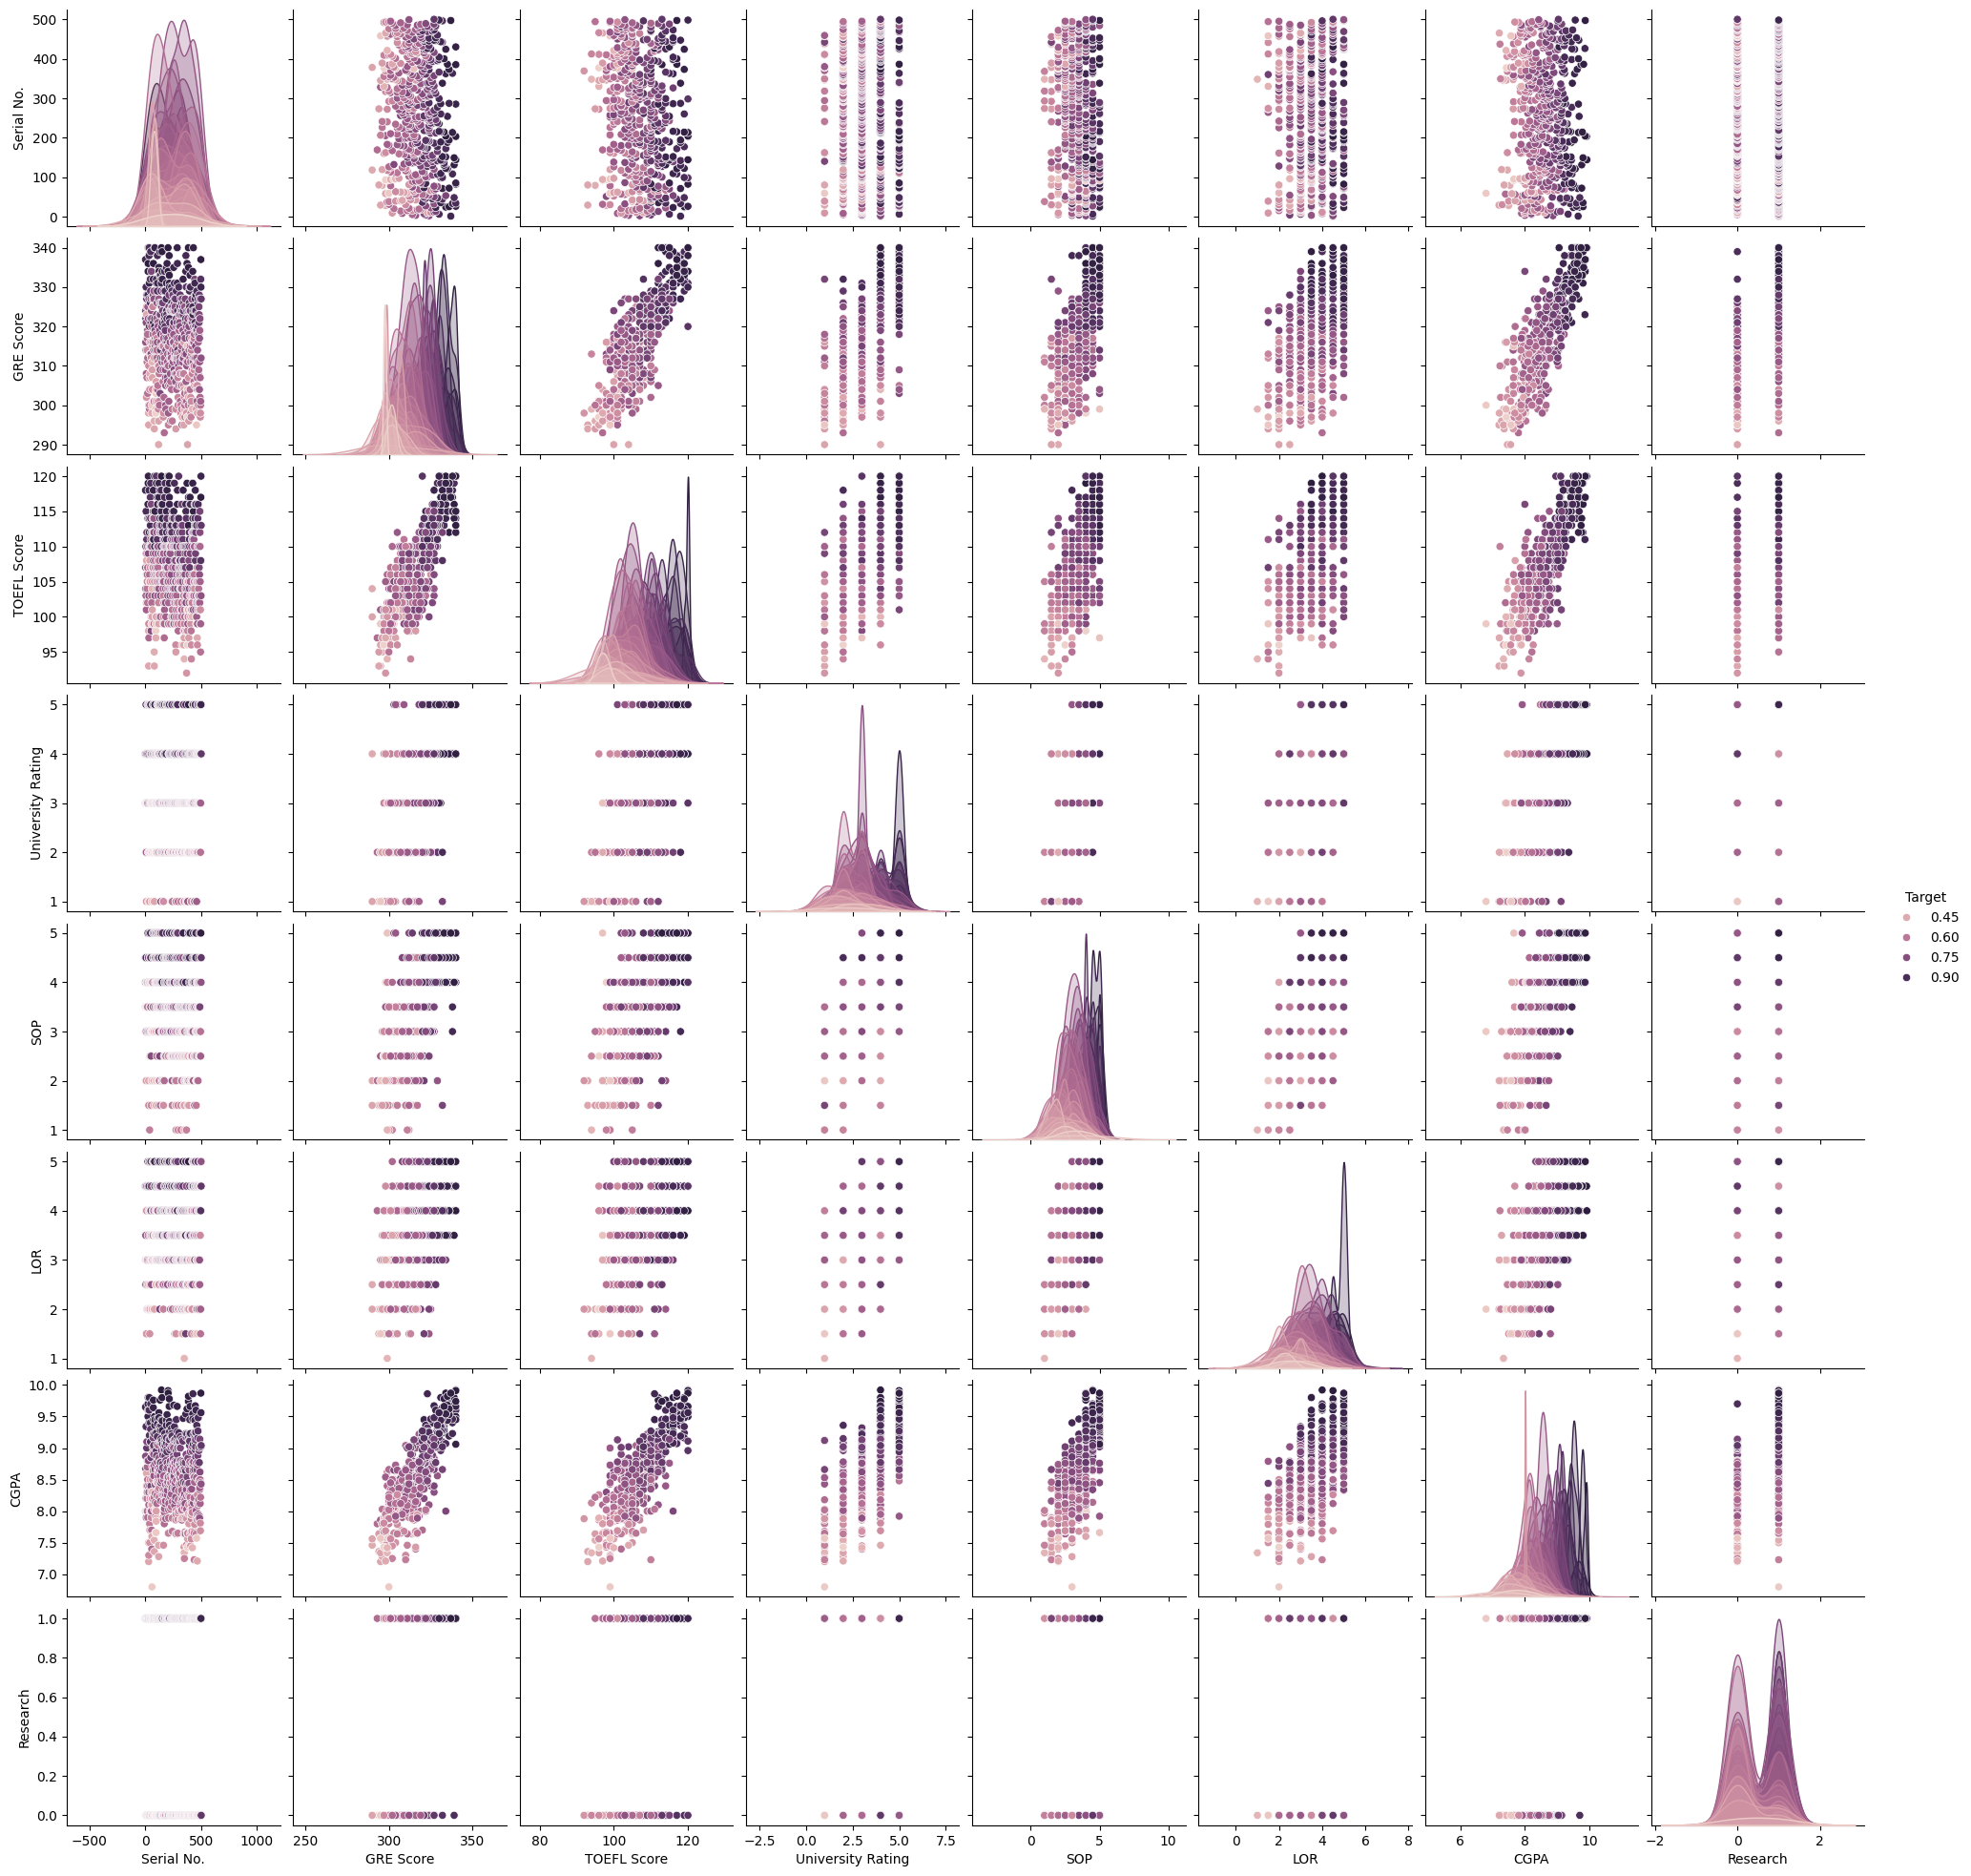

In [16]:
sns.pairplot(data=df, hue='Target')
plt.show()

Correlation:
Target               1.000000
CGPA                 0.882413
GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
Research             0.545871
Serial No.           0.008505
Name: Target, dtype: float64


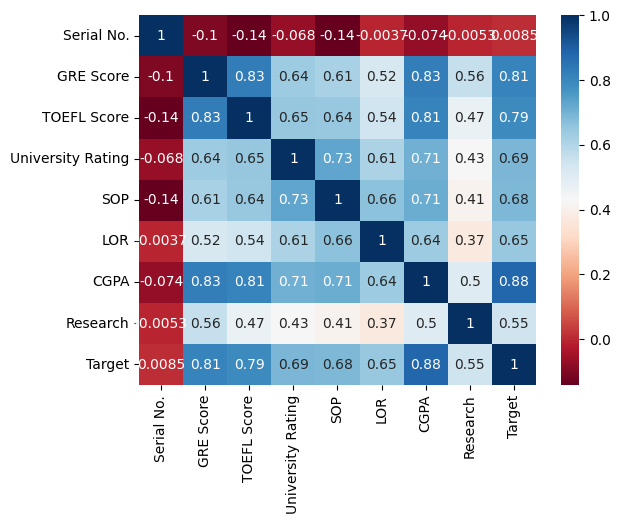

In [17]:
# Check correlation
print('Correlation:')
print(df.corr()['Target'].sort_values(ascending=False))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

In [18]:
print('Number of Authentication= ', df['Target'][df['Target'] == 0].count())
print('Number of Unauthenticated= ', df['Target'][df['Target'] == 1].count())

Number of Authentication=  0
Number of Unauthenticated=  0
